# RISK Examples

This notebook, `examples.ipynb`, showcases a collection of scripts that demonstrate the use of **RISK**, a Python package for biological network analysis. Each example highlights different features of RISK, guiding users through various use cases to explore and analyze biological networks efficiently. Whether you're new to RISK or looking to deepen your understanding, these examples offer a comprehensive overview of its capabilities.

### Demonstration Using the Yeast Interactome Network

In this notebook, we utilize the comprehensive yeast interactome network published by Michaelis et al. in 2023. This dataset represents a highly structured interactome of yeast (*Saccharomyces cerevisiae*), comprising 3,927 proteins connected by 31,004 interactions. For this demonstration, we focus on a refined network that includes proteins with six or more edges, resulting in 2,059 nodes and 27,690 edges. This network serves as a valuable model for exploring complex biological systems and understanding large-scale protein interactions.

By applying the **RISK** package to this yeast interactome network, we demonstrate various analyses, including network clustering, interaction mapping, and identification of key protein complexes. This example showcases the power of RISK in handling and deriving insights from extensive biological networks.

**Notably, this specific analysis and demonstration using the yeast interactome network have not been done before.** This makes our exploration both novel and valuable for researchers in systems biology and proteomics.


---

## 0. Installing RISK

To get started with **RISK**, you'll need to install `risk-network` using `pip`. Run the following command in a code cell or terminal to install the package:


In [1]:
# !pip install risk-network==0.0.6b9

---

## 1. Importing RISK

After installing **RISK**, the next step is to import it into your notebook. You can verify that the installation was successful by checking the version of the package.


In [2]:
import risk

# Check the version of the RISK package to ensure it's installed correctly
risk.__version__

'0.0.6-beta.10'

After verifying that the **RISK** package is installed and properly loaded, the next step is to import the `RISK` class. This class provides the core functionalities for performing biological network analysis.


In [3]:
from risk import RISK

To enable inline plotting in Jupyter notebooks, we'll use the `%matplotlib inline` magic command. This ensures that all plots generated during the analysis are displayed directly within the notebook.


In [4]:
%matplotlib inline

---

## 2. RISK Object Initialization

This code block initializes a **RISK** object with specific parameters. Below is a description of each parameter:


In [5]:
# Initialize the RISK object

risk = RISK()

---

## 3. Loading Network for RISK Analysis

In this section, we demonstrate various methods for loading a network into the **RISK** package to enable comprehensive biological network analysis. **RISK** supports multiple input formats, offering flexibility in importing your network data. Below are examples of how to load networks from different sources:

### Supported Network Formats:
- **Cytoscape Files (`.cys`)**: Load networks directly from Cytoscape files using the `load_cytoscape_network` method. This is particularly useful for complex networks visualized or processed in Cytoscape. You can specify the source and target node labels and optionally select a specific view from the file.
- **Cytoscape JSON Files (`.cyjs`)**: If your network data is saved in Cytoscape JSON format, the `load_cytoscape_json_network` method allows you to import it while specifying the source and target labels for accurate node and edge interpretation.
- **GPickle Files (`.gpickle`)**: Networks serialized in `.gpickle` format can be reloaded using the `load_gpickle_network` method. This approach is ideal for preserving and reloading complex network structures without data loss.
- **NetworkX Graphs**: If your networks are in a NetworkX graph object, the `load_networkx_network` method converts them to a RISK-compatible format. This step is convenient for integrating existing NetworkX workflows with **RISK**.


### Cytoscape Files (.cys)


#### Parameters

- **`filepath` (str)**: Path to the Cytoscape file.
- **`source_label` (str, optional)**: Source node label. Defaults to `"source"`.
- **`target_label` (str, optional)**: Target node label. Defaults to `"target"`.
- **`view_name` (str, optional)**: Specific view name to load. Defaults to `None`.
- **`compute_sphere` (bool, optional)**: Whether to map nodes to a sphere. Defaults to `True`.
- **`surface_depth` (float, optional)**: Surface depth for the sphere. Defaults to `0.0`.
- **`min_edges_per_node` (int, optional)**: Minimum number of edges per node. Defaults to `0`.
- **`include_edge_weight` (bool, optional)**: Whether to include edge weights in calculations. Defaults to `True`.
- **`weight_label` (str, optional)**: Label for edge weights. Defaults to `"weight"`.

### Returns

- **`nx.Graph`**: The loaded and processed Cytoscape network as a NetworkX graph.


In [6]:
# Load the network from a Cytoscape file for RISK analysis

network = risk.load_cytoscape_network(
    filepath="./data/cytoscape/michaelis_2023.cys",
    source_label="source",
    target_label="target",
    view_name="",
    compute_sphere=True,
    surface_depth=0.1,
    min_edges_per_node=0,
    include_edge_weight=False,
    weight_label="weight",
)

---------------
Loading network
---------------
Filetype: Cytoscape
Filepath: ./data/cytoscape/michaelis_2023.cys
Edge weight: Excluded
Minimum edges per node: 0
Projection: Sphere
Surface depth: 0.1
Initial node count: 2059
Final node count: 2059
Initial edge count: 27690
Final edge count: 27690


### Cytoscape JSON Files (.cyjs)


#### Parameters

- **`filepath` (str)**: Path to the Cytoscape JSON file.
- **`source_label` (str, optional)**: Source node label. Default is `"source"`.
- **`target_label` (str, optional)**: Target node label. Default is `"target"`.
- **`compute_sphere` (bool, optional)**: Whether to map nodes to a sphere. Defaults to `True`.
- **`surface_depth` (float, optional)**: Surface depth for the sphere. Defaults to `0.0`.
- **`min_edges_per_node` (int, optional)**: Minimum number of edges per node. Defaults to `0`.
- **`include_edge_weight` (bool, optional)**: Whether to include edge weights in calculations. Defaults to `True`.
- **`weight_label` (str, optional)**: Label for edge weights. Defaults to `"weight"`.

#### Returns

- **`nx.Graph`**: The loaded and processed Cytoscape JSON network as a NetworkX graph.


In [11]:
# Load the network from a Cytoscape JSON file for RISK analysis

network = risk.load_cytoscape_json_network(
    filepath="./data/cyjs/michaelis_2023.cyjs",
    source_label="source",
    target_label="target",
    compute_sphere=True,
    surface_depth=0.1,
    min_edges_per_node=0,
    include_edge_weight=False,
    weight_label="weight",
)

---------------
Loading network
---------------
Filetype: Cytoscape JSON
Filepath: ./data/cyjs/michaelis_2023.cyjs
Edge weight: Excluded
Minimum edges per node: 0
Projection: Sphere
Surface depth: 0.1
Initial node count: 2059
Final node count: 2059
Initial edge count: 27690
Final edge count: 27690


### GPickle Files (.gpickle)


#### Parameters

- **`filepath` (str)**: Path to the GPickle file.
- **`compute_sphere` (bool, optional)**: Whether to map nodes to a sphere. Defaults to `True`.
- **`surface_depth` (float, optional)**: Surface depth for the sphere. Defaults to `0.0`.
- **`min_edges_per_node` (int, optional)**: Minimum number of edges per node. Defaults to `0`.
- **`include_edge_weight` (bool, optional)**: Whether to include edge weights in calculations. Defaults to `True`.
- **`weight_label` (str, optional)**: Label for edge weights. Defaults to `"weight"`.

#### Returns

- **`nx.Graph`**: The loaded and processed GPickle network as a NetworkX graph.


In [13]:
# Load the network from a GPickle file for RISK analysis

network = risk.load_gpickle_network(
    filepath="./data/gpickle/michaelis_2023.gpickle",
    compute_sphere=True,
    surface_depth=0.1,
    min_edges_per_node=0,
    include_edge_weight=False,
    weight_label="weight",
)

---------------
Loading network
---------------
Filetype: GPickle
Filepath: ./data/gpickle/michaelis_2023.gpickle
Edge weight: Excluded
Minimum edges per node: 0
Projection: Sphere
Surface depth: 0.1
Initial node count: 2059
Final node count: 2059
Initial edge count: 27690
Final edge count: 27690


### NetworkX Graphs

#### Parameters

- **`network` (nx.Graph)**: A NetworkX graph object.
- **`compute_sphere` (bool, optional)**: Whether to map nodes to a sphere. Defaults to `True`.
- **`surface_depth` (float, optional)**: Surface depth for the sphere. Defaults to `0.0`.
- **`min_edges_per_node` (int, optional)**: Minimum number of edges per node. Defaults to `0`.
- **`include_edge_weight` (bool, optional)**: Whether to include edge weights in calculations. Defaults to `True`.
- **`weight_label` (str, optional)**: Label for edge weights. Defaults to `"weight"`.

#### Returns

- **`nx.Graph`**: The loaded and processed NetworkX graph.


In [15]:
# Load the network from a NetworkX graph for RISK analysis

network = risk.load_networkx_network(
    network=network,
    compute_sphere=True,
    surface_depth=0.1,
    min_edges_per_node=0,
    include_edge_weight=False,
    weight_label="weight",
)

---------------
Loading network
---------------
Filetype: NetworkX
Edge weight: Excluded
Minimum edges per node: 0
Projection: Sphere
Surface depth: 0.1
Initial node count: 2059
Final node count: 2059
Initial edge count: 27690
Final edge count: 27690


---

## 4. Loading and Associating Annotations with the Network

In this section, we demonstrate how to load various types of annotations and associate them with the network for comprehensive analysis using the **RISK** package. Annotations add context to the network by linking nodes to specific biological terms, such as Gene Ontology (GO) terms.

### Supported Annotation Formats:
1. **JSON Annotations**:
   - Load annotations from a JSON file and associate them with the network.
   - Example: GO Biological Process (BP) annotations in `go_biological_process.json`.
2. **CSV Annotations**:
   - Load annotations from a CSV file, using a custom delimiter for column separation.
   - Example: GO Biological Process (BP) annotations in `go_biological_process.csv`.
3. **TSV Annotations**:
   - Load annotations from a TSV file, with tab-separated values for columns.
   - Example: GO Biological Process (BP) annotations in `go_biological_process.tsv`.
4. **Excel Annotations**:
   - Load annotations from a specified sheet in an Excel file, allowing the integration of spreadsheet data.
   - Example: GO Biological Process (BP) annotations in `go_biological_process.xlsx`.


### JSON Files (.json)

#### Parameters

- **`filepath` (str)**: Path to the JSON annotations file.
- **`network` (NetworkX graph)**: The network to which the annotations are related.

#### Returns

- **`dict`**: A dictionary containing ordered nodes, ordered annotations, and the annotations matrix.


In [7]:
# Load GO Biological Process (BP) annotations from a JSON file and associate them with the existing network

annotations = risk.load_json_annotation(
    filepath="./data/json/annotations/go_biological_process.json",
    network=network,
)

# Note: You can also load other GO annotations, such as:
# - 'go_cellular_component.json' for GO Cellular Component (CC) annotations
# - 'go_molecular_function.json' for GO Molecular Function (MF) annotations

-------------------
Loading annotations
-------------------
Filetype: JSON
Filepath: ./data/json/annotations/go_biological_process.json


### CSV Files (.csv)

#### Parameters

- **`filepath` (str)**: Path to the CSV annotations file.
- **`network` (nx.Graph)**: The NetworkX graph to which the annotations are related.
- **`label_colname` (str)**: Name of the column containing the labels (e.g., GO terms).
- **`nodes_colname` (str)**: Name of the column containing the nodes associated with each label.
- **`nodes_delimiter` (str, optional)**: Delimiter used to separate multiple nodes within the nodes column. Defaults to `';'`.

#### Returns

- **`dict`**: A dictionary containing ordered nodes, ordered annotations, and the annotations matrix.


In [33]:
# Load GO Biological Process (BP) annotations from a CSV file and associate them with the existing network

annotations = risk.load_csv_annotation(
    filepath="./data/csv/annotations/go_biological_process.csv",
    network=network,
    label_colname="label",
    nodes_colname="nodes",
    nodes_delimiter=";",
)

# Note: You can also load other GO annotations using similar filenames, such as:
# - 'go_cellular_component.csv' for GO Cellular Component (CC) annotations
# - 'go_molecular_function.csv' for GO Molecular Function (MF) annotations

-------------------
Loading annotations
-------------------
Filetype: CSV
Filepath: ./data/csv/annotations/go_biological_process.csv


### TSV Files (.tsv)

#### Parameters

- **`filepath` (str)**: Path to the TSV annotations file.
- **`network` (nx.Graph)**: The NetworkX graph to which the annotations are related.
- **`label_colname` (str)**: Name of the column containing the labels (e.g., GO terms).
- **`nodes_colname` (str)**: Name of the column containing the nodes associated with each label.
- **`nodes_delimiter` (str, optional)**: Delimiter used to separate multiple nodes within the nodes column. Defaults to `';'`.

#### Returns

- **`dict`**: A dictionary containing ordered nodes, ordered annotations, and the annotations matrix.


In [21]:
# Load GO Biological Process (BP) annotations from a TSV file and associate them with the existing network

annotations = risk.load_tsv_annotation(
    filepath="./data/tsv/annotations/go_biological_process.tsv",  # Path to the TSV file containing GO BP annotations
    network=network,  # The network object to which the GO BP annotations will be associated
    label_colname="label",  # The column name in the TSV file that contains the labels (e.g., GO terms)
    nodes_colname="nodes",  # The column name in the TSV file that contains the nodes associated with each label
    nodes_delimiter=";",  # The delimiter used to separate nodes in the 'nodes' column
)

# Note: You can also load other GO annotations using similar filenames, such as:
# - 'go_cellular_component.tsv' for GO Cellular Component (CC) annotations
# - 'go_molecular_function.tsv' for GO Molecular Function (MF) annotations

-------------------
Loading annotations
-------------------
Filetype: TSV
Filepath: ./data/tsv/annotations/go_biological_process.tsv


### Excel Files (.xlsx, .xls)

#### Parameters

- **`filepath` (str)**: Path to the Excel annotations file.
- **`network` (nx.Graph)**: The NetworkX graph to which the annotations are related.
- **`label_colname` (str)**: Name of the column containing the labels (e.g., GO terms).
- **`nodes_colname` (str)**: Name of the column containing the nodes associated with each label.
- **`sheet_name` (str, optional)**: The name of the Excel sheet to load. Defaults to `'Sheet1'`.
- **`nodes_delimiter` (str, optional)**: Delimiter used to separate multiple nodes within the nodes column. Defaults to `';'`.

#### Returns

- **`dict`**: A dictionary containing ordered nodes, ordered annotations, and the annotations matrix.


In [24]:
# Load GO Biological Process (BP) annotations from an Excel file and associate them with the existing network

annotations = risk.load_excel_annotation(
    filepath="./data/excel/annotations/go_biological_process.xlsx",
    network=network,
    label_colname="label",
    nodes_colname="nodes",
    sheet_name="Sheet1",
    nodes_delimiter=";",
)

# Note: You can also load other GO annotations using similar filenames, such as:
# - 'go_cellular_component.xlsx' for GO Cellular Component (CC) annotations
# - 'go_molecular_function.xlsx' for GO Molecular Function (MF) annotations

-------------------
Loading annotations
-------------------
Filetype: Excel
Filepath: ./data/excel/annotations/go_biological_process.xlsx


### Dictionary Annotations

#### Parameters

- **`content` (dict)**: The annotations dictionary to load.
- **`network` (nx.Graph)**: The NetworkX graph to which the annotations are related.

#### Returns

- **`dict`**: A dictionary containing ordered nodes, ordered annotations, and the annotations matrix.


In [29]:
# Load the JSON file into a dictionary, then use the dictionary to load annotations

import json

json_file_path = "./data/json/annotations/go_biological_process.json"
with open(json_file_path, "r") as file:
    annotations_dict = json.load(file)

# Use the loaded dictionary with the load_dict_annotation method
annotations = risk.load_dict_annotation(
    content=annotations_dict,
    network=network,
)

-------------------
Loading annotations
-------------------
Filetype: Dictionary
Filepath: In-memory dictionary


---

## 5. Statistical Tests for Annotation Enrichment Calculation

This section introduces three statistical tests for assessing annotation enrichment and depletion within biological networks. These tests provide a rigorous evaluation of network substructures and their associated annotations, offering insights into the significance of observed enrichment patterns. Below are examples of how to apply each method:

- **Permutation Test**: This test reshuffles the annotation data to create a null distribution, evaluating the statistical significance of observed annotation enrichment or depletion within the network. The `load_neighborhoods_by_permutation` method allows you to specify the number of permutations, random seed, and other parameters to control the test.

- **Fisher's Exact Test**: Designed for categorical data, Fisher's exact test evaluates the significance of the association between annotations and network substructures. It is suitable for small sample sizes where the assumptions of other statistical tests may not hold. The `load_neighborhoods_by_fisher_exact` method applies this test to calculate p-values for annotation enrichment and depletion.

- **Hypergeometric Test**: This test assesses the probability of observing a specific number of annotated nodes in a subnetwork, given the overall annotation distribution. It is useful for scenarios involving finite populations, such as gene sets or pathway analyses. The `load_neighborhoods_by_hypergeom` method facilitates this test, allowing you to quantify the significance of annotation enrichment within a network context.


### Permutation Test

#### Parameters

- **`network` (nx.Graph)**: The network graph.
- **`annotations` (dict)**: The annotations associated with the network.
- **`distance_metric` (str, optional)**: Method used to compute distances. Options include:
  - `'dijkstra'`: Computes shortest paths using Dijkstra's algorithm. *(default)*
  - `'louvain'`: Applies the Louvain method for community detection.
  - `'label_propagation'`: Uses label propagation to find communities.
  - `'markov_clustering'`: Implements the Markov Clustering Algorithm.
  - `'walktrap'`: Detects communities via random walks.
  - `'spinglass'`: Community detection based on the spinglass model.
- **`louvain_resolution` (float, optional)**: Resolution parameter for the Louvain method. Defaults to `0.1`.
- **`edge_length_threshold` (float, optional)**: Edge length threshold for neighborhood analysis. Defaults to `0.5`.
- **`score_metric` (str, optional)**: Metric used to score neighborhoods. Options include:
  - `'sum'`: Sums the annotation values within each neighborhood. *(default)*
  - `'stdev'`: Computes the standard deviation of annotation values within each neighborhood.
  - `'z_score'`: Calculates the Z-score for neighborhood annotation values.
- **`null_distribution` (str, optional)**: Defines the type of null distribution to use for comparison. Options include:
  - `'network'`: Randomly permuted network structure. *(default)*
  - `'annotations'`: Randomly permuted annotations.
- **`num_permutations` (int, optional)**: Number of permutations for significance testing. Defaults to `1000`.
- **`random_seed` (int, optional)**: Seed for random number generation. Defaults to `888`.
- **`max_workers` (int, optional)**: Maximum number of workers for parallel computation. Defaults to `1`.

#### Returns

- **`dict`**: A dictionary containing the computed significance of neighborhoods within the network.


In [8]:
# Perform annotation enrichment analysis by computing p-values for network neighborhoods using the permutation test

neighborhoods = risk.load_neighborhoods_by_permutation(
    network=network,
    annotations=annotations,
    distance_metric="louvain",
    louvain_resolution=10,
    edge_length_threshold=0.25,
    score_metric="stdev",
    null_distribution="network",
    num_permutations=1000,
    random_seed=887,
    max_workers=5,
)

------------------------
Running permutation test
------------------------
Distance metric: 'louvain (resolution=10)'
Edge length threshold: 0.25
Random seed: 887
Neighborhood scoring metric: 'stdev'
Null distribution: 'network'
Number of permutations: 1000
Maximum workers: 5


Total progress: 100%|████████████████████████████████████████████████| 1000/1000 [02:52<00:00,  5.78it/s]


### Fisher's Exact Test

#### Parameters

- **`network` (nx.Graph)**: The network graph.
- **`annotations` (dict)**: The annotations associated with the network.
- **`distance_metric` (str, optional)**: Method used to compute distances. Options include:
  - `'dijkstra'`: Computes shortest paths using Dijkstra's algorithm. *(default)*
  - `'louvain'`: Applies the Louvain method for community detection.
  - `'label_propagation'`: Uses label propagation to find communities.
  - `'markov_clustering'`: Implements the Markov Clustering Algorithm.
  - `'walktrap'`: Detects communities via random walks.
  - `'spinglass'`: Community detection based on the spinglass model.
- **`louvain_resolution` (float, optional)**: Resolution parameter for the Louvain method. Defaults to `0.1`.
- **`edge_length_threshold` (float, optional)**: Edge length threshold for neighborhood analysis. Defaults to `0.5`.
- **`random_seed` (int, optional)**: Seed for random number generation. Defaults to `888`.
- **`max_workers` (int, optional)**: Maximum number of workers for parallel computation. Defaults to `1`.

#### Returns

- **`dict`**: A dictionary containing the computed significance of neighborhoods within the network.


In [38]:
# Perform annotation enrichment analysis by computing p-values for network neighborhoods using Fisher's exact test

neighborhoods = risk.load_neighborhoods_by_fisher_exact(
    network=network,
    annotations=annotations,
    distance_metric="louvain",
    louvain_resolution=10,
    edge_length_threshold=0.25,
    random_seed=887,
    max_workers=4,
)

### Hypergeometric Test

#### Parameters

- **`network` (nx.Graph)**: The network graph.
- **`annotations` (dict)**: The annotations associated with the network.
- **`distance_metric` (str, optional)**: Method used to compute distances. Options include:
  - `'dijkstra'`: Computes shortest paths using Dijkstra's algorithm. *(default)*
  - `'louvain'`: Applies the Louvain method for community detection.
  - `'label_propagation'`: Uses label propagation to find communities.
  - `'markov_clustering'`: Implements the Markov Clustering Algorithm.
  - `'walktrap'`: Detects communities via random walks.
  - `'spinglass'`: Community detection based on the spinglass model.
- **`louvain_resolution` (float, optional)**: Resolution parameter for the Louvain method. Defaults to `0.1`.
- **`edge_length_threshold` (float, optional)**: Edge length threshold for neighborhood analysis. Defaults to `0.5`.
- **`random_seed` (int, optional)**: Seed for random number generation. Defaults to `888`.
- **`max_workers` (int, optional)**: Maximum number of workers for parallel computation. Defaults to `1`.

#### Returns

- **`dict`**: A dictionary containing the computed significance of neighborhoods within the network.


In [ ]:
# Perform annotation enrichment analysis by computing p-values for network neighborhoods using the hypergeometric test

neighborhoods = risk.load_neighborhoods_by_hypergeom(
    network=network,
    annotations=annotations,
    distance_metric="louvain",
    louvain_resolution=10,
    edge_length_threshold=0.25,
    random_seed=887,
    max_workers=4,
)

---

## 6. Loading the Network Graph

The `load_graph` function in **RISK** generates a `NetworkGraph` object for analyzing the network. This function integrates various network components, such as annotations and neighborhood scores, and provides options to customize clustering and analysis parameters.

### Parameters

- **`network` (nx.Graph)**: The network graph containing the nodes and edges to be analyzed.
- **`annotations` (dict)**: The annotations associated with the network, typically derived from biological or functional data.
- **`neighborhoods` (dict)**: The neighborhoods object, containing data from enrichment or depletion analysis.
- **`tail` (str, optional)**: Specifies the tail of the statistical test to use. Options include:
  - `'right'`: For enrichment. *(default)*
  - `'left'`: For depletion.
  - `'both'`: For two-tailed analysis.
- **`pval_cutoff` (float, optional)**: Cutoff value for p-values to determine significance. Defaults to `0.01`.
  - **Range**: Any value between 0 and 1.
- **`fdr_cutoff` (float, optional)**: Cutoff value for FDR-corrected p-values. Defaults to `0.9999`.
  - **Range**: Any value between 0 and 1.
- **`impute_depth` (int, optional)**: Depth for imputing missing values. Defaults to `1`.
  - **Range**: Any whole number greater than or equal to 0.
- **`prune_threshold` (float, optional)**: Threshold for pruning weak edges from the network graph. Defaults to `0.0`.
  - **Range**: Any value between 0 and 1.
- **`linkage_criterion` (str, optional)**: Criterion for clustering. Defaults to `'distance'`.
  - **Options**:
    - `'distance'`: Clusters are formed based on distance.
    - `'maxclust'`: Clusters are formed based on the maximum number of clusters.
- **`linkage_method` (str, optional)**: Method used for hierarchical clustering. Defaults to `'average'`.
  - **Options**:
    - `'auto'`: Automatically determines the optimal method.
    - Other options: `'single'`, `'complete'`, `'average'`, `'weighted'`, `'centroid'`, `'median'`, `'ward'`.
- **`linkage_metric` (str, optional)**: Distance metric used for clustering. Defaults to `'yule'`.
  - **Options**:
    - `'auto'`: Automatically determines the optimal metric.
    - Other options: `'braycurtis'`, `'canberra'`, `'chebyshev'`, `'cityblock'`, `'correlation'`, `'cosine'`, `'dice'`, `'euclidean'`, `'hamming'`, `'jaccard'`, `'jensenshannon'`, `'kulczynski1'`, `'mahalanobis'`, `'matching'`, `'minkowski'`, `'rogerstanimoto'`, `'russellrao'`, `'seuclidean'`, `'sokalmichener'`, `'sokalsneath'`, `'sqeuclidean'`, `'yule'`.
- **`min_cluster_size` (int, optional)**: Minimum size of clusters to be formed. Defaults to `5`.
- **`max_cluster_size` (int, optional)**: Maximum size of clusters to be formed. Defaults to `1000`.

### Returns

- **`NetworkGraph`**: A `NetworkGraph` object representing the processed network, ready for analysis and visualization.


In [9]:
# Get the NetworkGraph object for plotting

graph = risk.load_graph(
    network=network,
    annotations=annotations,
    neighborhoods=neighborhoods,
    tail="right",
    pval_cutoff=0.05,
    fdr_cutoff=1.0,
    impute_depth=0,
    prune_threshold=0.25,
    linkage_criterion="distance",
    linkage_method="average",
    linkage_metric="yule",
    min_cluster_size=6,
    max_cluster_size=1000,
)

---------------------------------
Finding significant neighborhoods
---------------------------------
p-value cutoff: 0.05
FDR BH cutoff: 1.0
Significance tail: 'right' (enrichment)
------------------------
Processing neighborhoods
------------------------
Imputation depth: 0
Pruning threshold: 0.25
-----------------------
Finding top annotations
-----------------------
Min cluster size: 6
Max cluster size: 1000
-----------------------------------------
Optimizing distance threshold for domains
-----------------------------------------


Evaluating optimal linkage method and metric: 100%|███████████████████████████████████| 1/1 [00:05<00:00]


Linkage criterion: 'distance'
Linkage method: 'average'
Linkage metric: 'yule'
Optimal linkage threshold: 0.251


---

## 7. Visualizing the Network Graph

The `load_plotter` function in **RISK** initializes a `NetworkPlotter` object, enabling you to visualize the network graph. You can customize various aspects of the plot, such as the figure size and background color.

### Parameters

- **`graph` (NetworkGraph)**: The `NetworkGraph` object containing the network structure to be visualized.
- **`figsize` (tuple, optional)**: Size of the figure, specified as a tuple `(width, height)` in inches. Defaults to `(10, 10)`.
- **`background_color` (str, optional)**: Background color of the plot. Defaults to `"white"`.

### Returns

- **`NetworkPlotter`**: A `NetworkPlotter` object configured with the provided parameters, used for further customization and plotting of the network.


In [10]:
# Turn interactive plotting off - this enables the graph to be built across multiple cells

import matplotlib.pyplot as plt

plt.ioff()

In [27]:
# Initialize the NetworkPlotter with the NetworkGraph object

plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

---------------
Loading plotter
---------------


## 7a. Plotting the Network Perimeter

**RISK** offers two options for plotting the network perimeter: a simple circular outline or a detailed contour based on node density. Both options are customizable in terms of size, style, and transparency.

### Plotting the Circle Perimeter

The `plot_circle_perimeter` function in **RISK** draws a circle around the network to represent its perimeter. You can customize the circle's scale, color, line style, and transparency.

#### Parameters

- **`scale` (float, optional)**: Scaling factor for the perimeter's diameter. Defaults to `1.0`.
- **`linestyle` (str, optional)**: Line style for the circle. Options include `"solid"`, `"dashed"`, `"dashdot"`, `"dotted"`, or any Matplotlib-supported linestyle. Defaults to `"dashed"`.
- **`linewidth` (float, optional)**: Width of the circle's outline. Defaults to `1.5`.
- **`color` (str, list, tuple, or np.ndarray, optional)**: Color of the circle. Can be a string, list, tuple, or NumPy array. Defaults to `"black"`.
- **`outline_alpha` (float, optional)**: Transparency level for the circle's outline. Defaults to `1.0`.
- **`fill_alpha` (float, optional)**: Transparency level for the circle’s fill. Defaults to `0.0`.


In [28]:
# Plot network perimeter as a circle

plotter.plot_circle_perimeter(
    scale=1.05,
    linestyle="dashed",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

### Plotting the Contour Perimeter

The `plot_contour_perimeter` function in **RISK** plots a Kernel Density Estimate (KDE)-based contour around the network, representing its perimeter. This method allows for flexible customization of the contour levels, color, and transparency.

#### Parameters

- **`scale` (float, optional)**: Scaling factor for the perimeter size. Defaults to `1.0`.
- **`levels` (int, optional)**: Number of contour levels. Defaults to `3`.
- **`bandwidth` (float, optional)**: Bandwidth for KDE, controlling the smoothness of the contour. Defaults to `0.8`.
- **`grid_size` (int, optional)**: Resolution of the grid for KDE. Higher values create finer contours. Defaults to `250`.
- **`color` (str, list, tuple, or np.ndarray, optional)**: Color of the contour. Can be a string, list, tuple, or NumPy array. Defaults to `"black"`.
- **`linestyle` (str, optional)**: Line style for the contour. Options include `"solid"`, `"dashed"`, `"dashdot"`, `"dotted"`, or any Matplotlib-supported linestyle. Defaults to `"solid"`.
- **`linewidth` (float, optional)**: Width of the contour’s outline. Defaults to `1.5`.
- **`outline_alpha` (float, optional)**: Transparency level for the contour's outline. Defaults to `1.0`.
- **`fill_alpha` (float, optional)**: Transparency level for the contour’s fill. Defaults to `0.0`.


In [13]:
# Draw a KDE-based contour around the network perimeter

plotter.plot_contour_perimeter(
    scale=1.00,
    levels=3,
    bandwidth=0.6,
    grid_size=250,
    color="white",
    linestyle="solid",
    linewidth=1.5,
    outline_alpha=1.0,
    fill_alpha=0.0,
)

## 7b. Plotting Network Nodes and Edges

The `plot_network` function in **RISK** allows you to visualize the network nodes and edges with various customization options.

### Parameters

- **`node_size` (int or np.ndarray, optional)**: Size of the nodes. Can be a single integer or an array of sizes. Defaults to `50`.
- **`node_shape` (str, optional)**: Shape of the nodes. Options include:
  - `'o'`: Circle. *(default)*
  - `'s'`: Square.
  - `'^'`: Triangle up.
  - `'v'`: Triangle down.
  - Other options: `'p'`, `'P'`, `'h'`, `'H'`, `'8'`, `'d'`, `'D'`, `'>'`, `'<`, `'|'`, `'_'`.
- **`node_edgewidth` (float, optional)**: Width of the edges around each node. Defaults to `1.0`.
- **`edge_width` (float, optional)**: Width of the edges in the plot. Defaults to `1.0`.
- **`node_color` (str, list, tuple, or np.ndarray, optional)**: Color of the nodes. Can be a single color or an array of colors. Defaults to `"white"`.
- **`node_edgecolor` (str, list, tuple, or np.ndarray, optional)**: Color of the edges around each node. Defaults to `"black"`.
- **`edge_color` (str, list, tuple, or np.ndarray, optional)**: Color of the edges connecting the nodes. Defaults to `"black"`.
- **`node_alpha` (float, optional)**: Alpha value (transparency) for the nodes. Range: `0.0` (fully transparent) to `1.0` (fully opaque). Defaults to `1.0`.
- **`edge_alpha` (float, optional)**: Alpha value (transparency) for the edges. Range: `0.0` (fully transparent) to `1.0` (fully opaque). Defaults to `1.0`.

--- 

### Annotated Node Size Parameters (for param `node_size`)

These parameters control the size of nodes based on their biological enrichment status.

#### Parameters

- **`enriched_size` (int, optional)**: Size for enriched nodes. Defaults to `50`.
- **`nonenriched_size` (int, optional)**: Size for non-enriched nodes. Defaults to `25`.

#### Returns

- **`np.ndarray`**: Array of node sizes, with enriched nodes larger than non-enriched ones.

---

### Annotated Node Color (for param `node_color`)

These parameters allow you to customize node colors, either by colormap or specific colors, based on enrichment or predefined categories.

#### Parameters

- **`cmap` (str, optional)**: The colormap to use for node colors. Defaults to `"gist_rainbow"`.
- **`color` (str or None, optional)**: A specific color to use for all nodes. If specified, this will override the colormap (`cmap`). Defaults to `None`.
- **`min_scale` (float, optional)**: Minimum scale for color intensity. Defaults to `0.8`.
- **`max_scale` (float, optional)**: Maximum scale for color intensity. Defaults to `1.0`.
- **`scale_factor` (float, optional)**: Factor for adjusting the color scaling intensity. Defaults to `1.0`.
- **`alpha` (float, optional)**: Alpha value for enriched nodes. Defaults to `1.0`.
- **`nonenriched_color` (str, list, tuple, or np.ndarray, optional)**: Color for non-enriched nodes. Defaults to `"white"`.
- **`nonenriched_alpha` (float, optional)**: Alpha value for non-enriched nodes. Defaults to `1.0`.
- **`random_seed` (int, optional)**: Seed for random number generation. Defaults to `888`.

#### Returns

- **`np.ndarray`**: Array of RGBA colors adjusted for enrichment status.


In [29]:
# Plot network nodes and edges

plotter.plot_network(
    node_size=plotter.get_annotated_node_sizes(
        enriched_size=100,
        nonenriched_size=10,
    ),
    node_edgewidth=1.0,
    node_shape="o",
    edge_width=0.0,
    node_color=plotter.get_annotated_node_colors(
        cmap="gist_rainbow",
        color=None,
        min_scale=0.75,
        max_scale=1.0,
        scale_factor=1.0,
        alpha=1.0,
        nonenriched_color="white",
        nonenriched_alpha=0.75,
        random_seed=887,
    ),
    node_edgecolor="black",
    edge_color="white",
    node_alpha=1.0,
    edge_alpha=1.0,
)

## 7b. Plotting a Subnetwork

The `plot_subnetwork` function in **RISK** allows you to focus on and visualize a subset of the network nodes and their connecting edges with customizable attributes.

### Parameters

- **`nodes` (list, tuple, or np.ndarray)**: List of node labels to include in the subnetwork. Accepts nested lists.
- **`node_size` (int or np.ndarray, optional)**: Size of the nodes. Can be a single integer or an array of sizes. Defaults to `50`.
- **`node_shape` (str, optional)**: Shape of the nodes. Options include:
  - `'o'`: Circle. *(default)*
  - `'s'`: Square.
  - `'^'`: Triangle up.
  - `'v'`: Triangle down.
  - Other options: `'p'`, `'P'`, `'h'`, `'H'`, `'8'`, `'d'`, `'D'`, `'>'`, `'<`, `'|'`, `'_'`.
- **`node_edgewidth` (float, optional)**: Width of the node edges. Defaults to `1.0`.
- **`edge_width` (float, optional)**: Width of the edges in the subnetwork plot. Defaults to `1.0`.
- **`node_color` (str, list, tuple, or np.ndarray, optional)**: Color of the nodes. Can be a single color or an array of colors. Defaults to `"white"`.
- **`node_edgecolor` (str, list, tuple, or np.ndarray, optional)**: Color of the node edges. Defaults to `"black"`.
- **`edge_color` (str, list, tuple, or np.ndarray, optional)**: Color of the edges connecting the nodes. Defaults to `"black"`.
- **`node_alpha` (float, optional)**: Transparency for the nodes. Range: `0.0` (fully transparent) to `1.0` (fully opaque). Defaults to `1.0`.
- **`edge_alpha` (float, optional)**: Transparency for the edges. Range: `0.0` (fully transparent) to `1.0` (fully opaque). Defaults to `1.0`.

### Raises

- **`ValueError`**: If no valid nodes are found in the network graph.


In [30]:
# Plot a subnetwork with custom node and edge attributes

plotter.plot_subnetwork(
    nodes=[
        "LSM1",
        "LSM2",
        "LSM3",
        "LSM4",
        "LSM5",
        "LSM6",
        "LSM7",
        "PAT1",
    ],
    node_size=50,
    node_shape="o",
    node_edgewidth=1.0,
    edge_width=1.0,
    node_color="white",
    node_edgecolor="black",
    edge_color="black",
    node_alpha=1.0,
    edge_alpha=1.0,
)

## 7c. Plotting Contours

The `plot_contours` function in **RISK** allows you to visualize density contours around network nodes. This can help identify regions of high node density or clustering within the network.

### Parameters

- **`levels` (int, optional)**: Number of contour levels to plot. Defaults to `5`.
- **`bandwidth` (float, optional)**: Bandwidth for KDE, controlling the smoothness of the contour. Defaults to `0.8`.
- **`grid_size` (int, optional)**: Resolution of the grid for KDE. Higher values create finer contours. Defaults to `250`.
- **`color` (str, list, tuple, or np.ndarray, optional)**: Color of the contours. Can be a single color or an array of colors. Defaults to `"white"`.
- **`linestyle` (str, optional)**: Line style for the contours. Options include `'solid'`, `'dashed'`, `'dashdot'`, `'dotted'`. Defaults to `"solid"`.
- **`linewidth` (float, optional)**: Line width for the contours. Defaults to `1.5`.
- **`alpha` (float, optional)**: Transparency level of the contour lines. Range: `0.0` (fully transparent) to `1.0` (fully opaque). Defaults to `1.0`.
- **`fill_alpha` (float, optional)**: Transparency level of the contour fill. Defaults to `0.2`.

### Returns

- **`None`**: This function does not return any value. It directly plots the contours on the network graph.

--- 

### Annotated Contour Color Parameters (for param `color`)

These parameters allow you to define or generate contour colors based on a colormap or specific colors.

#### Parameters

- **`cmap` (str, optional)**: The colormap to use for contour colors. Defaults to `"gist_rainbow"`. For domains with multiple nodes, the brightest color (based on the sum of RGB values) will be selected.
- **`color` (str or None, optional)**: A specific color to use for all contours. If specified, this will overwrite the colormap (`cmap`). Defaults to `None`.
- **`min_scale` (float, optional)**: Minimum intensity scale for the colors generated by the colormap. Controls the dimmest colors. Defaults to `0.8`.
- **`max_scale` (float, optional)**: Maximum intensity scale for the colors generated by the colormap. Controls the brightest colors. Defaults to `1.0`.
- **`scale_factor` (float, optional)**: Exponent for adjusting color scaling based on enrichment scores. A higher value increases contrast by dimming lower scores more. Defaults to `1.0`.
- **`random_seed` (int, optional)**: Seed for random number generation to ensure reproducibility. Defaults to `888`.

#### Returns

- **`np.ndarray`**: Array of RGBA colors for contour annotations.


In [31]:
# Plot KDE-based contours around network nodes

plotter.plot_contours(
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    color=plotter.get_annotated_contour_colors(
        cmap="gist_rainbow",
        min_scale=0.75,
        max_scale=1.0,
        scale_factor=1.0,
        random_seed=887,
    ),
    linestyle="solid",
    linewidth=1.5,
    alpha=1.0,
    fill_alpha=0.2,
)

## 7c. Plotting a Subcontour

The `plot_subcontour` function in **RISK** allows you to focus on and visualize contours around a specific subset of nodes using Kernel Density Estimation (KDE). This feature is useful for highlighting particular pathways or regions of interest within the network.

### Parameters

- **`nodes` (list, tuple, or np.ndarray)**: List of node labels or list of lists of node labels to plot the contour for.
- **`levels` (int, optional)**: Number of contour levels to plot. Defaults to `5`.
- **`bandwidth` (float, optional)**: Bandwidth for KDE, controlling the smoothness of the contour. Defaults to `0.8`.
- **`grid_size` (int, optional)**: Resolution of the grid for KDE. Higher values create finer contours. Defaults to `250`.
- **`color` (str, list, tuple, or np.ndarray, optional)**: Color of the contour. Can be a string (e.g., `"white"`) or an RGBA array. Defaults to `"white"`.
- **`linestyle` (str, optional)**: Line style for the contour. Options include `'solid'`, `'dashed'`, `'dashdot'`, `'dotted'`. Defaults to `"solid"`.
- **`linewidth` (float, optional)**: Line width for the contour. Defaults to `1.5`.
- **`alpha` (float, optional)**: Transparency level of the contour lines. Range: `0.0` (fully transparent) to `1.0` (fully opaque). Defaults to `1.0`.
- **`fill_alpha` (float, optional)**: Transparency level of the contour fill. Defaults to `0.2`.

### Raises

- **`ValueError`**: If no valid nodes are found in the network graph.


In [32]:
# Plot custom KDE-based contours around a subset of nodes

plotter.plot_subcontour(
    nodes=[
        "LSM1",
        "LSM2",
        "LSM3",
        "LSM4",
        "LSM5",
        "LSM6",
        "LSM7",
        "PAT1",
    ],
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    color="white",
    linestyle="solid",
    linewidth=1.5,
    alpha=1.0,
    fill_alpha=0.2,
)

## 7c. Plotting Labels

The `plot_labels` method in the `NetworkPlotter` class is used to annotate the network with labels. This function provides various customization options to adjust the appearance and placement of labels within the network graph.

### Parameters

- **`scale` (float, optional)**: Scale factor for positioning labels around the perimeter. Defaults to `1.05`.
- **`offset` (float, optional)**: Offset distance for labels from the perimeter. Defaults to `0.1`.
- **`font` (str, optional)**: Font name for the labels. Defaults to `"Arial"`.
- **`fontsize` (int, optional)**: Font size for the labels. Defaults to `10`.
- **`fontcolor` (str, list, tuple, or np.ndarray, optional)**: Color of the label text. Can be a string or RGBA array. Defaults to `"black"`.
- **`fontalpha` (float, optional)**: Transparency level for the font color. Range: `0.0` (fully transparent) to `1.0` (fully opaque). Defaults to `1.0`.
- **`arrow_linewidth` (float, optional)**: Line width of the arrows pointing to centroids. Defaults to `1`.
- **`arrow_style` (str, optional)**: Style of the arrows pointing to centroids. Defaults to `"->"`.
- **`arrow_color` (str, list, tuple, or np.ndarray, optional)**: Color of the arrows. Defaults to `"black"`.
- **`arrow_alpha` (float, optional)**: Transparency level for the arrow color. Range: `0.0` (fully transparent) to `1.0` (fully opaque). Defaults to `1.0`.
- **`arrow_base_shrink` (float, optional)**: Distance between the text and the base of the arrow. Defaults to `0.0`.
- **`arrow_tip_shrink` (float, optional)**: Distance between the arrow tip and the centroid. Defaults to `0.0`.
- **`max_labels` (int, optional)**: Maximum number of labels to plot. Defaults to `None` (no limit).
- **`max_words` (int, optional)**: Maximum number of words in a label. Defaults to `10`.
- **`min_words` (int, optional)**: Minimum number of words required to display a label. Defaults to `1`.
- **`max_word_length` (int, optional)**: Maximum number of characters in a word to display. Defaults to `20`.
- **`min_word_length` (int, optional)**: Minimum number of characters in a word to display. Defaults to `1`.
- **`words_to_omit` (list, optional)**: List of words to omit from the labels. Defaults to `None`.
- **`overlay_ids` (bool, optional)**: Whether to overlay domain IDs in the center of the centroids. Defaults to `False`.
- **`ids_to_keep` (list, tuple, np.ndarray, or None, optional)**: IDs of domains that must be labeled. To discover domain IDs, you can set `overlay_ids=True`. Defaults to `None`.
- **`ids_to_replace` (dict, optional)**: A dictionary mapping domain IDs to custom labels (strings). If provided, the custom labels will replace the default domain terms. To discover domain IDs, you can set `overlay_ids=True`. Defaults to `None`.

### Raises

- **`ValueError`**: If the number of provided `ids_to_keep` exceeds `max_labels`.

---

### Annotated Label Color Parameters (for params `fontcolor` and `arrow_color`)

Customize the appearance of the labels with a colormap or a specific color.

#### Parameters

- **`cmap` (str, optional)**: The colormap to use for label colors. For domains with multiple nodes, the brightest color (based on the sum of RGB values) will be selected. Defaults to `"gist_rainbow"`.
- **`color` (str or None, optional)**: A specific color to use for all labels. **Warning**: If specified, this will overwrite the colormap (`cmap`). Defaults to `None`.
- **`min_scale` (float, optional)**: Minimum intensity scale for the colors generated by the colormap. Controls the dimmest colors. Defaults to `0.8`.
- **`max_scale` (float, optional)**: Maximum intensity scale for the colors generated by the colormap. Controls the brightest colors. Defaults to `1.0`.
- **`scale_factor` (float, optional)**: Exponent for adjusting color scaling based on enrichment scores. A higher value increases contrast by dimming lower scores more. Defaults to `1.0`.
- **`random_seed` (int, optional)**: Seed for random number generation to ensure reproducibility. Defaults to `888`.

#### Returns

- **`np.ndarray`**: Array of RGBA colors for label annotations.


In [33]:
# Plot labels on the network

plotter.plot_labels(
    scale=1.25,
    offset=0.10,
    font="Arial",
    fontsize=10,
    fontcolor=plotter.get_annotated_label_colors(
        cmap="gist_rainbow",
        color=None,
        min_scale=1.0,
        max_scale=1.0,
        scale_factor=1.0,
        random_seed=887,
    ),
    fontalpha=1.0,
    arrow_linewidth=1,
    arrow_style="->",
    arrow_color="white",
    arrow_alpha=1.0,
    arrow_base_shrink=0.0,
    arrow_tip_shrink=0.0,
    max_labels=50,
    max_words=4,
    min_words=2,
    max_word_length=30,
    min_word_length=3,
    words_to_omit=["process", "biosynthetic"],
    overlay_ids=False,
    ids_to_keep=None,
    ids_to_replace=None,
)

## 7d. Plot Sublabel

The `plot_sublabel` method in the `NetworkPlotter` class is designed to annotate the network graph with a single label for a specified set of nodes. This method provides customization options for the label's appearance, positioning, font transparency, and the arrow pointing to the nodes.

### Parameters

- **`nodes` (list, tuple, or np.ndarray)**: List of node labels or list of lists of node labels to be used for calculating the centroid.
- **`label` (str)**: The label to be annotated on the network.
- **`radial_position` (float, optional)**: Radial angle for positioning the label around the network's perimeter. Range: `0-360` degrees. Defaults to `0.0`.
- **`scale` (float, optional)**: Scale factor for positioning the label around the perimeter. Defaults to `1.05`.
- **`offset` (float, optional)**: Offset distance for the label from the perimeter. Defaults to `0.10`.
- **`font` (str, optional)**: Font name for the label. Defaults to `"Arial"`.
  - **Options**: Any valid font name (e.g., "Arial", "Times New Roman").
- **`fontsize` (int, optional)**: Font size for the label. Defaults to `10`.
  - **Options**: Any integer value representing font size.
- **`fontcolor` (str, list, tuple, or np.ndarray, optional)**: Color of the label text. Defaults to `"black"`.
  - **Options**: Any valid color name or hex code (e.g., "black", "#000000").
- **`fontalpha` (float, optional)**: Transparency level for the label font. Range: `0.0` (fully transparent) to `1.0` (fully opaque). Defaults to `1.0`.
- **`arrow_linewidth` (float, optional)**: Line width of the arrow pointing to the centroid. Defaults to `1`.
- **`arrow_style` (str, optional)**: Style of the arrows pointing to the centroid. Defaults to `"->"`.
- **`arrow_color` (str, list, tuple, or np.ndarray, optional)**: Color of the arrow. Defaults to `"black"`.
  - **Options**: Any valid color name or hex code (e.g., "black", "#000000").
- **`arrow_alpha` (float, optional)**: Transparency level for the arrow. Range: `0.0` (fully transparent) to `1.0` (fully opaque). Defaults to `1.0`.
- **`arrow_base_shrink` (float, optional)**: Distance between the text and the base of the arrow. Defaults to `0.0`.
- **`arrow_tip_shrink` (float, optional)**: Distance between the arrow tip and the centroid. Defaults to `0.0`.


In [34]:
# Plot sublabels on the network

plotter.plot_sublabel(
    nodes=[
        "LSM1",
        "LSM2",
        "LSM3",
        "LSM4",
        "LSM5",
        "LSM6",
        "LSM7",
        "PAT1",
    ],
    label="LSM1-7-PAT1 Complex",
    radial_position=73,
    scale=1.6,
    offset=0.10,
    font="Arial",
    fontsize=14,
    fontcolor="white",
    fontalpha=1.0,
    arrow_linewidth=1.5,
    arrow_style="->",
    arrow_color="white",
    arrow_alpha=1.0,
    arrow_base_shrink=0.0,
    arrow_tip_shrink=0.0,
)

## 7e. Plotting Utility Methods in NetworkPlotter

The `NetworkPlotter` class provides utility methods for managing the display and saving of plots. These methods interface directly with Matplotlib functions, facilitating easy integration into your plotting workflows.

### Saving the Plot

The `savefig` method in **RISK** saves the current plot to a file. You can specify the filename, format, and additional options to customize the output.

#### Parameters

- **`*args`**: Positional arguments passed to `plt.savefig`. Commonly used for specifying the filename (e.g., `"plot.png"`).
- **`**kwargs`**: Keyword arguments passed to `plt.savefig`, such as `format` (e.g., `"png"`, `"pdf"`) and other options like `dpi` and `bbox_inches`.


In [35]:
# Save the plot to a file

# plotter.savefig("network_plot.png")

### Displaying the Plot

The `show` method in **RISK** displays the current plot. This method is typically the last step after configuring your plot and is essential for visualizing your results.

#### Parameters

- **`*args`**: Positional arguments passed to `plt.show`. Typically not used, but can be included for consistency.
- **`**kwargs`**: Keyword arguments passed to `plt.show`, such as `block` to control whether the display blocks the execution of code.


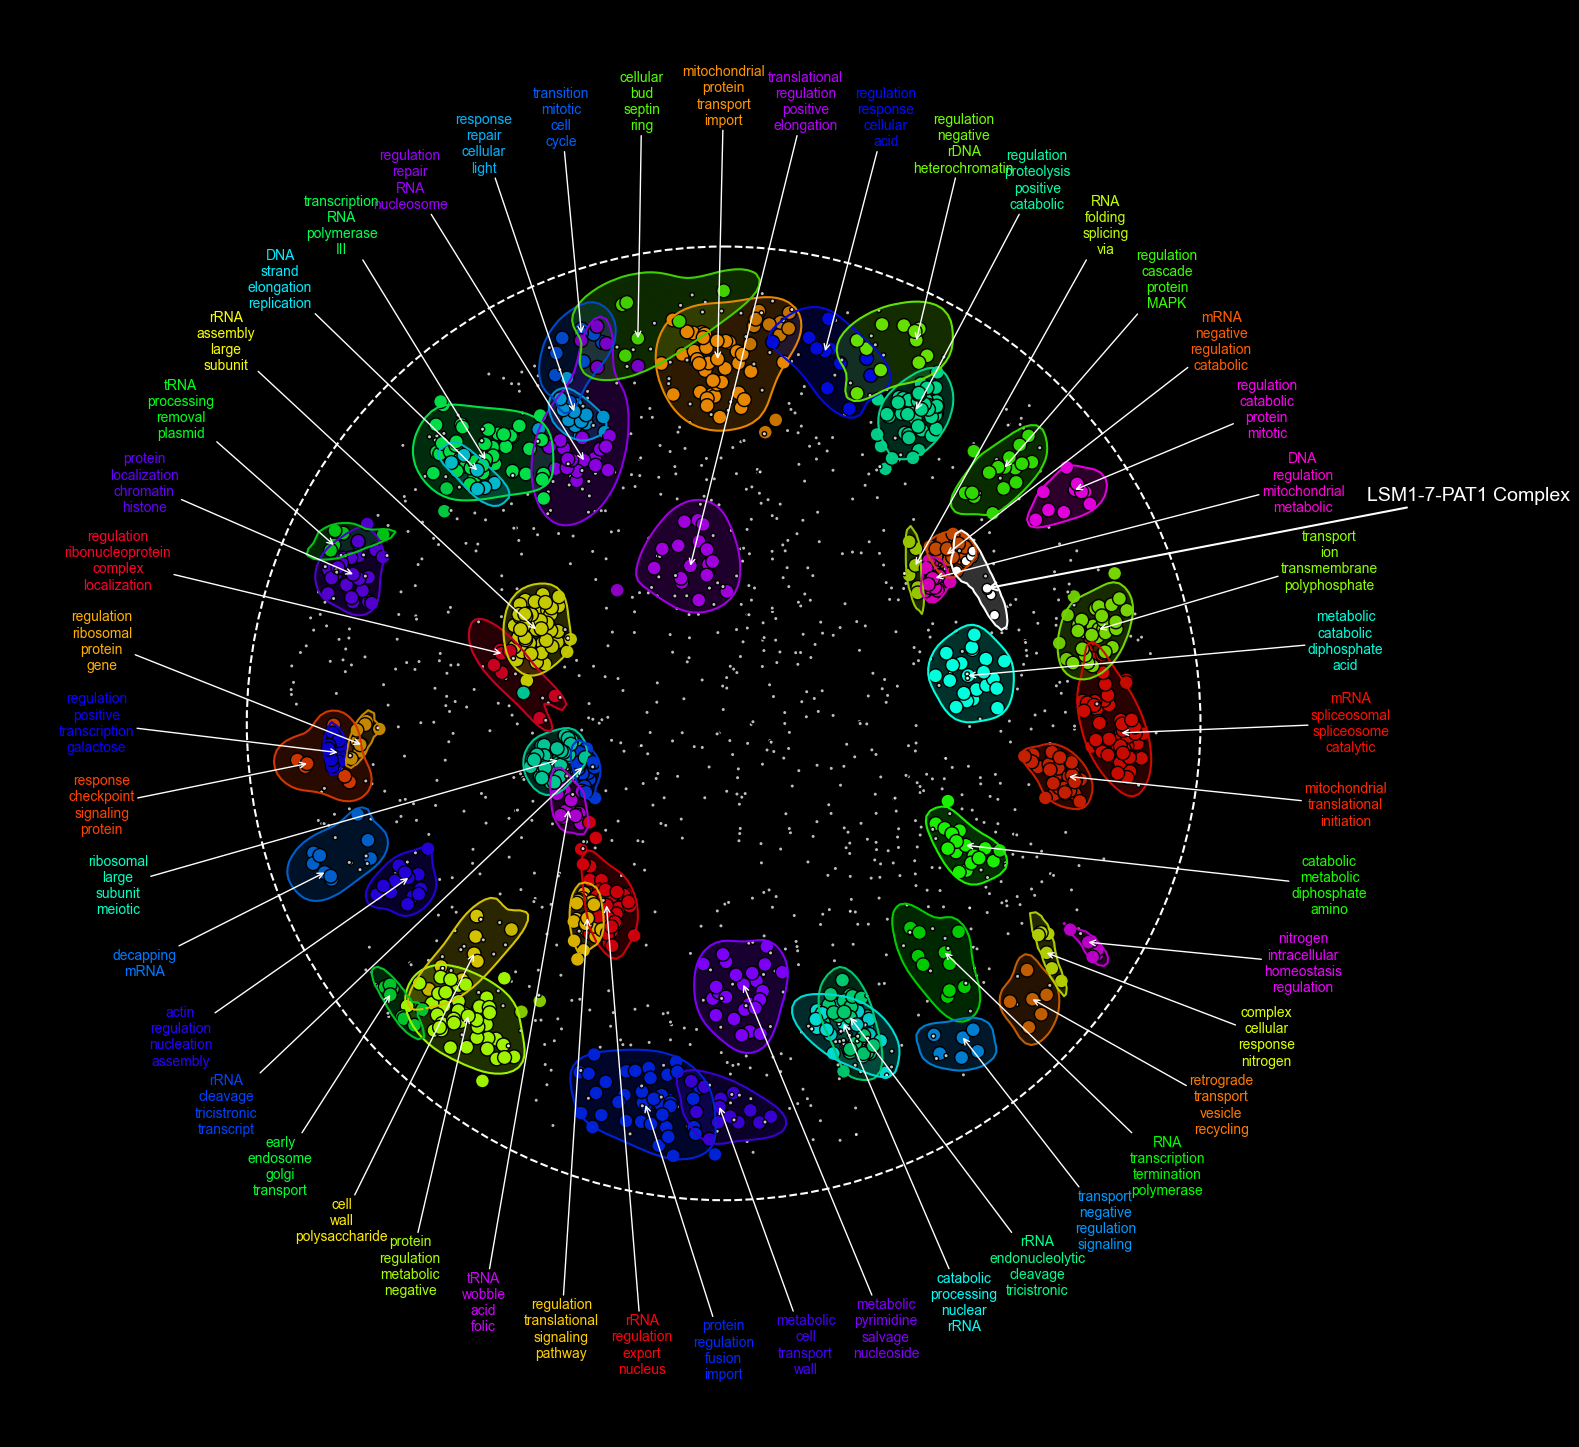

In [36]:
# Display the plot

plotter.show()

## 7. [Troubleshoot] Potential Plotting Issue in Jupyter Notebooks

When using the `NetworkPlotter` class in a Jupyter Notebook, you might notice that the plot is automatically displayed when `plt.subplots` is called during plot initialization. This can result in the plot appearing prematurely in the cell where it's created, even if you intend to display it later using `plotter.show()`.

If you encounter this issue, refer to the following cell to properly display the plot.


---------------
Loading plotter
---------------


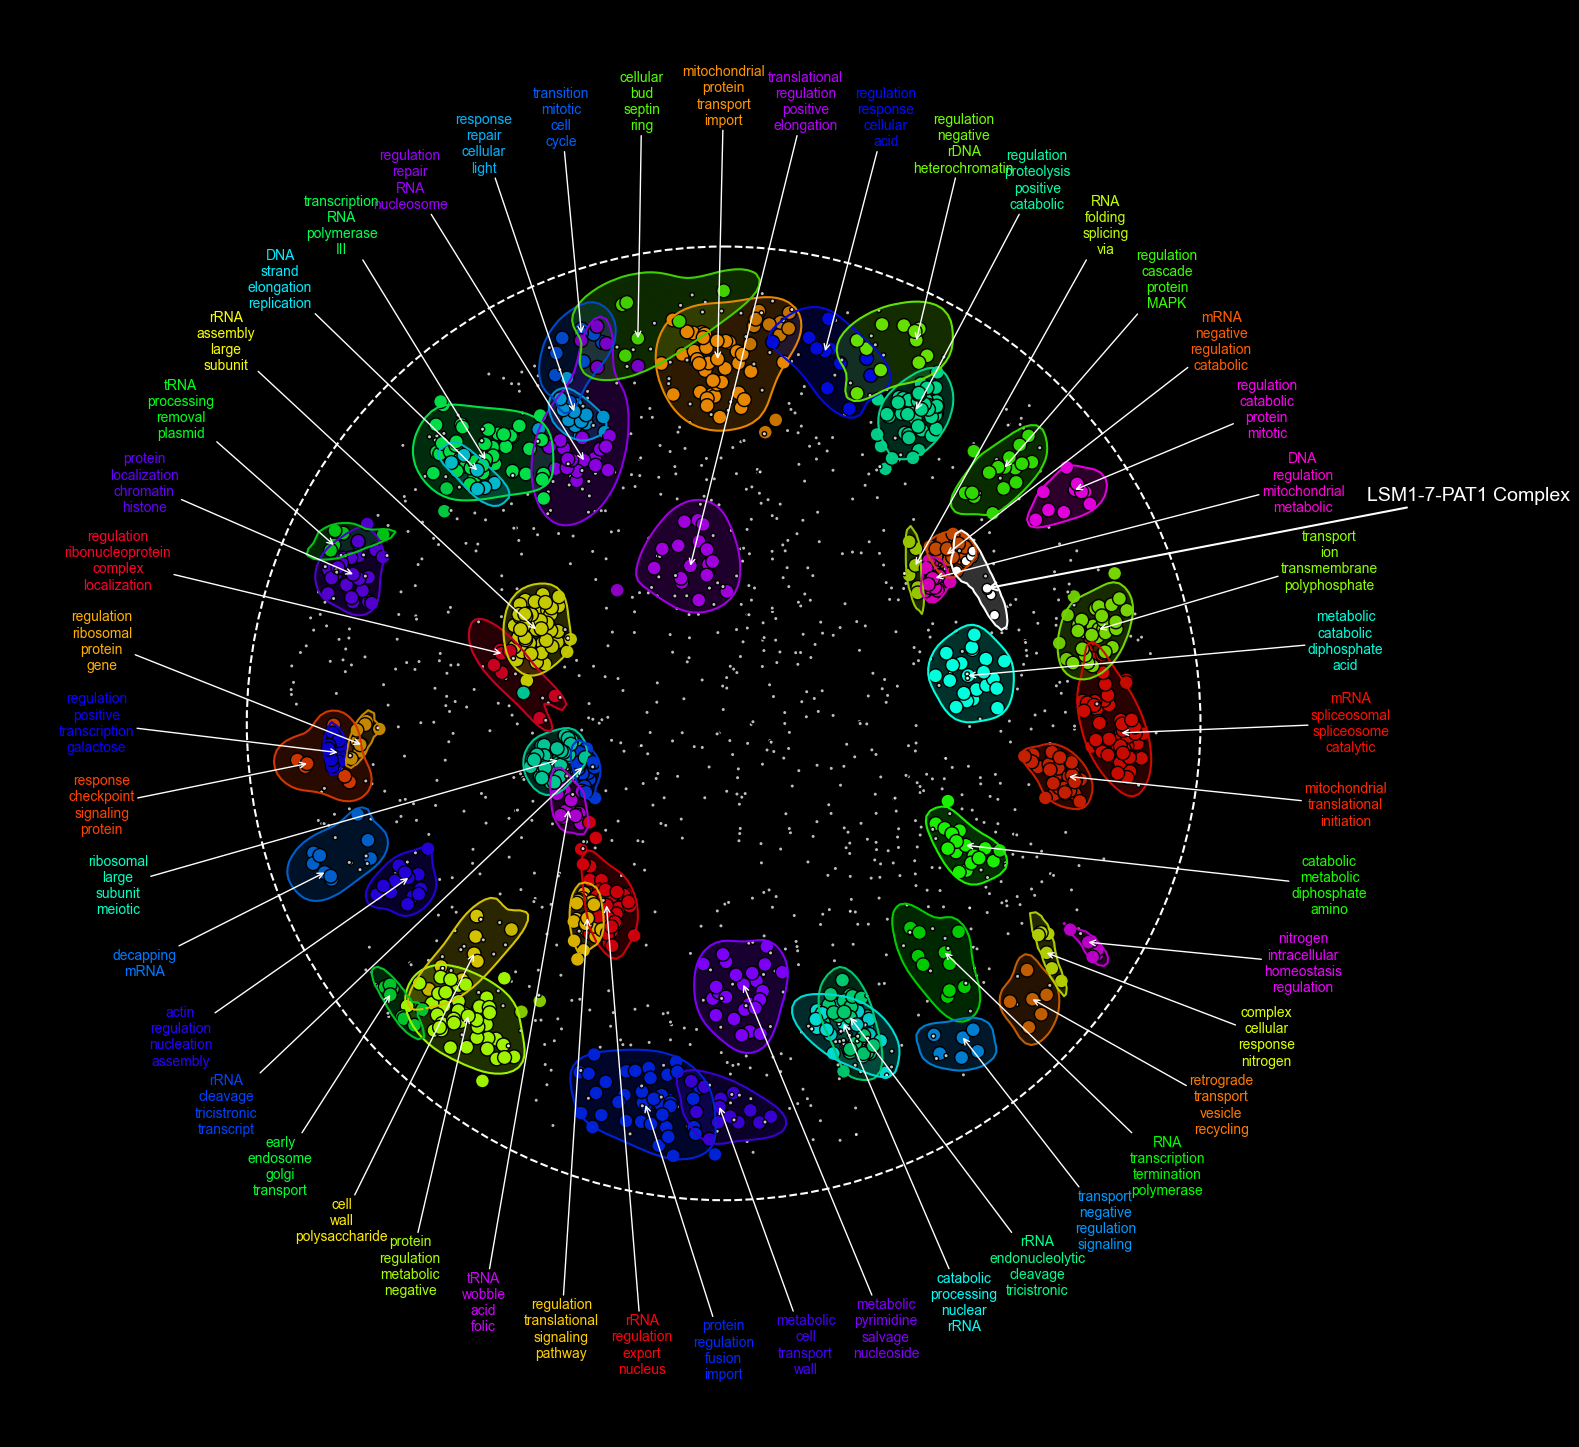

In [52]:
# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.05,
    linestyle="dashed",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot network nodes and edges
plotter.plot_network(
    node_size=plotter.get_annotated_node_sizes(
        enriched_size=100,
        nonenriched_size=10,
    ),
    node_edgewidth=1.0,
    node_shape="o",
    edge_width=0.0,
    node_color=plotter.get_annotated_node_colors(
        cmap="gist_rainbow",
        color=None,
        min_scale=0.75,
        max_scale=1.0,
        scale_factor=1.0,
        alpha=1.0,
        nonenriched_color="white",
        nonenriched_alpha=0.75,
        random_seed=887,
    ),
    node_edgecolor="black",
    edge_color="white",
    node_alpha=1.0,
    edge_alpha=1.0,
)

# Plot a subnetwork with custom node and edge attributes
plotter.plot_subnetwork(
    nodes=[
        "LSM1",
        "LSM2",
        "LSM3",
        "LSM4",
        "LSM5",
        "LSM6",
        "LSM7",
        "PAT1",
    ],
    node_size=50,
    node_shape="o",
    node_edgewidth=1.0,
    edge_width=1.0,
    node_color="white",
    node_edgecolor="black",
    edge_color="black",
    node_alpha=1.0,
    edge_alpha=1.0,
)

# Plot KDE-based contours around network nodes
plotter.plot_contours(
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    color=plotter.get_annotated_contour_colors(
        cmap="gist_rainbow",
        min_scale=0.75,
        max_scale=1.0,
        scale_factor=1.0,
        random_seed=887,
    ),
    linestyle="solid",
    linewidth=1.5,
    alpha=1.0,
    fill_alpha=0.2,
)

# Plot custom KDE-based contours around a subset of nodes
plotter.plot_subcontour(
    nodes=[
        "LSM1",
        "LSM2",
        "LSM3",
        "LSM4",
        "LSM5",
        "LSM6",
        "LSM7",
        "PAT1",
    ],
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    color="white",
    linestyle="solid",
    linewidth=1.5,
    alpha=1.0,
    fill_alpha=0.2,
)

# Plot labels on the network
plotter.plot_labels(
    scale=1.25,
    offset=0.10,
    font="Arial",
    fontsize=10,
    fontcolor=plotter.get_annotated_label_colors(
        cmap="gist_rainbow",
        color=None,
        min_scale=1.0,
        max_scale=1.0,
        scale_factor=1.0,
        random_seed=887,
    ),
    fontalpha=1.0,
    arrow_linewidth=1,
    arrow_style="->",
    arrow_color="white",
    arrow_alpha=1.0,
    arrow_base_shrink=0.0,
    arrow_tip_shrink=0.0,
    max_labels=50,
    max_words=4,
    min_words=2,
    max_word_length=30,
    min_word_length=3,
    words_to_omit=["process", "biosynthetic"],
    overlay_ids=False,
    ids_to_keep=None,
    ids_to_replace=None,
)

# Plot sublabels on the network
plotter.plot_sublabel(
    nodes=[
        "LSM1",
        "LSM2",
        "LSM3",
        "LSM4",
        "LSM5",
        "LSM6",
        "LSM7",
        "PAT1",
    ],
    label="LSM1-7-PAT1 Complex",
    radial_position=73,
    scale=1.6,
    offset=0.10,
    font="Arial",
    fontsize=14,
    fontcolor="white",
    fontalpha=1.0,
    arrow_linewidth=1.5,
    arrow_style="->",
    arrow_color="white",
    arrow_alpha=1.0,
    arrow_base_shrink=0.0,
    arrow_tip_shrink=0.0,
)

# Display the plot
plotter.show()

---

## 8. Overview of `risk.params`

The `risk.params` module in the **RISK** package is crucial for managing and exporting parameters related to network analysis. It provides methods to configure, save, and share the parameters used in your analysis. Below are the key methods offered by the `risk.params` module:

### Loading Parameters

The `load` method imports parameters from a predefined source, converting any `np.ndarray` values to lists for easier processing.

#### Returns

- **`dict`**: A dictionary containing the processed parameters.


In [23]:
# Load the parameters into a dictionary

loaded_params = risk.params.load()
loaded_params

------------------
Loading parameters
------------------


{'annotations': {'filepath': './data/json/annotations/go_biological_process.json',
  'filetype': 'JSON'},
 'datetime': '2024-09-18 15:24:27',
 'graph': {'tail': 'right',
  'pval_cutoff': 0.05,
  'fdr_cutoff': 1.0,
  'impute_depth': 0,
  'prune_threshold': 0.25,
  'linkage_criterion': 'distance',
  'linkage_method': 'average',
  'linkage_metric': 'yule',
  'min_cluster_size': 6,
  'max_cluster_size': 1000},
 'neighborhoods': {'distance_metric': 'louvain',
  'louvain_resolution': 10,
  'edge_length_threshold': 0.25,
  'statistical_test_function': 'permutation',
  'score_metric': 'stdev',
  'null_distribution': 'network',
  'num_permutations': 1000,
  'random_seed': 887,
  'max_workers': 5},
 'network': {'compute_sphere': True,
  'surface_depth': 0.1,
  'min_edges_per_node': 0,
  'include_edge_weight': False,
  'weight_label': 'weight',
  'filetype': 'Cytoscape',
  'filepath': './data/cytoscape/michaelis_2023.cys'},
 'plotter': {'figsize': (15, 15),
  'background_color': 'black',
  'perim

### Exporting Parameters to CSV

The `to_csv` method exports the parameters to a CSV file.

#### Parameters

- **`filepath` (str)**: The path where the CSV file will be saved.


In [24]:
# Export parameters to a CSV file

risk.params.to_csv(
    filepath="./data/csv/params/michaelis_2023.csv"
)  # The file path where the CSV file will be saved

------------------
Loading parameters
------------------
Parameters successfully exported to filepath: ./data/csv/params/michaelis_2023.csv


### Exporting Parameters to JSON

The `to_json` method exports the parameters to a JSON file, preserving the hierarchical structure of the data.

#### Parameters

- **`filepath` (str)**: The path where the JSON file will be saved.


In [25]:
# Export parameters to a JSON file

risk.params.to_json(
    filepath="./data/json/params/michaelis_2023.json"
)  # The file path where the JSON file will be saved

------------------
Loading parameters
------------------
Parameters successfully exported to filepath: ./data/json/params/michaelis_2023.json


### Exporting Parameters to Text

The `to_txt` method exports the parameters to a plain text file in a human-readable format.

#### Parameters

- **`filepath` (str)**: The path where the text file will be saved.


In [26]:
# Export parameters to a text file

risk.params.to_txt(
    filepath="./data/txt/params/michaelis_2023.txt"
)  # The file path where the text file will be saved

------------------
Loading parameters
------------------
Parameters successfully exported to filepath: ./data/txt/params/michaelis_2023.txt


---

## 9. Advanced Plotting

In this section, we will demonstrate how to analyze the yeast interactome using **RISK** to identify and visualize party hubs and date hubs. Party hubs are typically coexpressed with their interacting partners, while date hubs interact with different partners across various times or conditions. Using the [SPELL](https://spell.yeastgenome.org/) database, we calculated the median coexpression of each protein's interactions and identified the top and bottom 10% for enrichment analysis. We found that party hubs are enriched in ribosomal processes, whereas date hubs are associated mainly with metabolic processes.

### Step 1: Loading Nodes and Colors

First, we load the nodes and their corresponding RGBA color values for both highly and lowly coexpressed proteins from JSON files. These nodes will represent the party hubs (high coexpression) and date hubs (low coexpression) within the network.


In [37]:
import json


def load_json_to_dict(json_file_path):
    """Load a JSON file into a dictionary."""
    with open(json_file_path, "r") as file:
        annotations_dict = json.load(file)
    return annotations_dict


# Load high coexpression nodes and colors
high_coexpression_michaelis_2023_rgba = load_json_to_dict(
    "./data/json/coexpression/high_coexpression_michaelis_2023.json"
)
high_coexpression_nodes, high_coexpression_colors = zip(
    *high_coexpression_michaelis_2023_rgba.items()
)

# Load low coexpression nodes and colors
low_coexpression_michaelis_2023_rgba = load_json_to_dict(
    "./data/json/coexpression/low_coexpression_michaelis_2023.json"
)
low_coexpression_nodes, low_coexpression_colors = zip(*low_coexpression_michaelis_2023_rgba.items())

### Step 2: Mapping Domains to Labels

To highlight specific biological processes in the network, we map domains to their corresponding labels. The `get_labels` function retrieves node labels associated with specified domain IDs from the interactome network. In this example, we use domain IDs to extract labels for ribosomal and metabolic processes, which will be visualized in the network plot.


In [48]:
def get_labels(domain_ids):
    """Retrieve node labels associated with the given domain IDs."""
    if not isinstance(domain_ids, list):
        domain_ids = [domain_ids]
    all_labels = []
    for domain_id in domain_ids:
        all_labels.extend(graph.domain_id_to_node_labels_map[domain_id])

    return all_labels


# To find the appropriate IDs, set `overlay_ids=True` in `plotter.plot_labels`. Use the desired domain ID(s) for each arrow endpoint.
# Map domain IDs to node labels for ribosomal and metabolic processes
ribosome_nodes_0 = get_labels([24, 26])
ribosome_nodes_1 = get_labels([16, 17, 18, 19, 21, 22, 23])
metab_nodes_0 = get_labels(1)
metab_nodes_1 = get_labels(2)
metab_nodes_2 = get_labels(30)
metab_nodes_3 = get_labels(33)

### Step 3: Plotting the Network

With the nodes, colors, and domain labels prepared, we proceed to visualize the yeast interactome network using **RISK**. In this step, we plot the network to highlight party hubs and date hubs, along with their enrichment in ribosomal and metabolic processes. The **RISK** package offers extensive customization options, allowing us to adjust node sizes, colors, shapes, contours, labels, and more.


---------------
Loading plotter
---------------


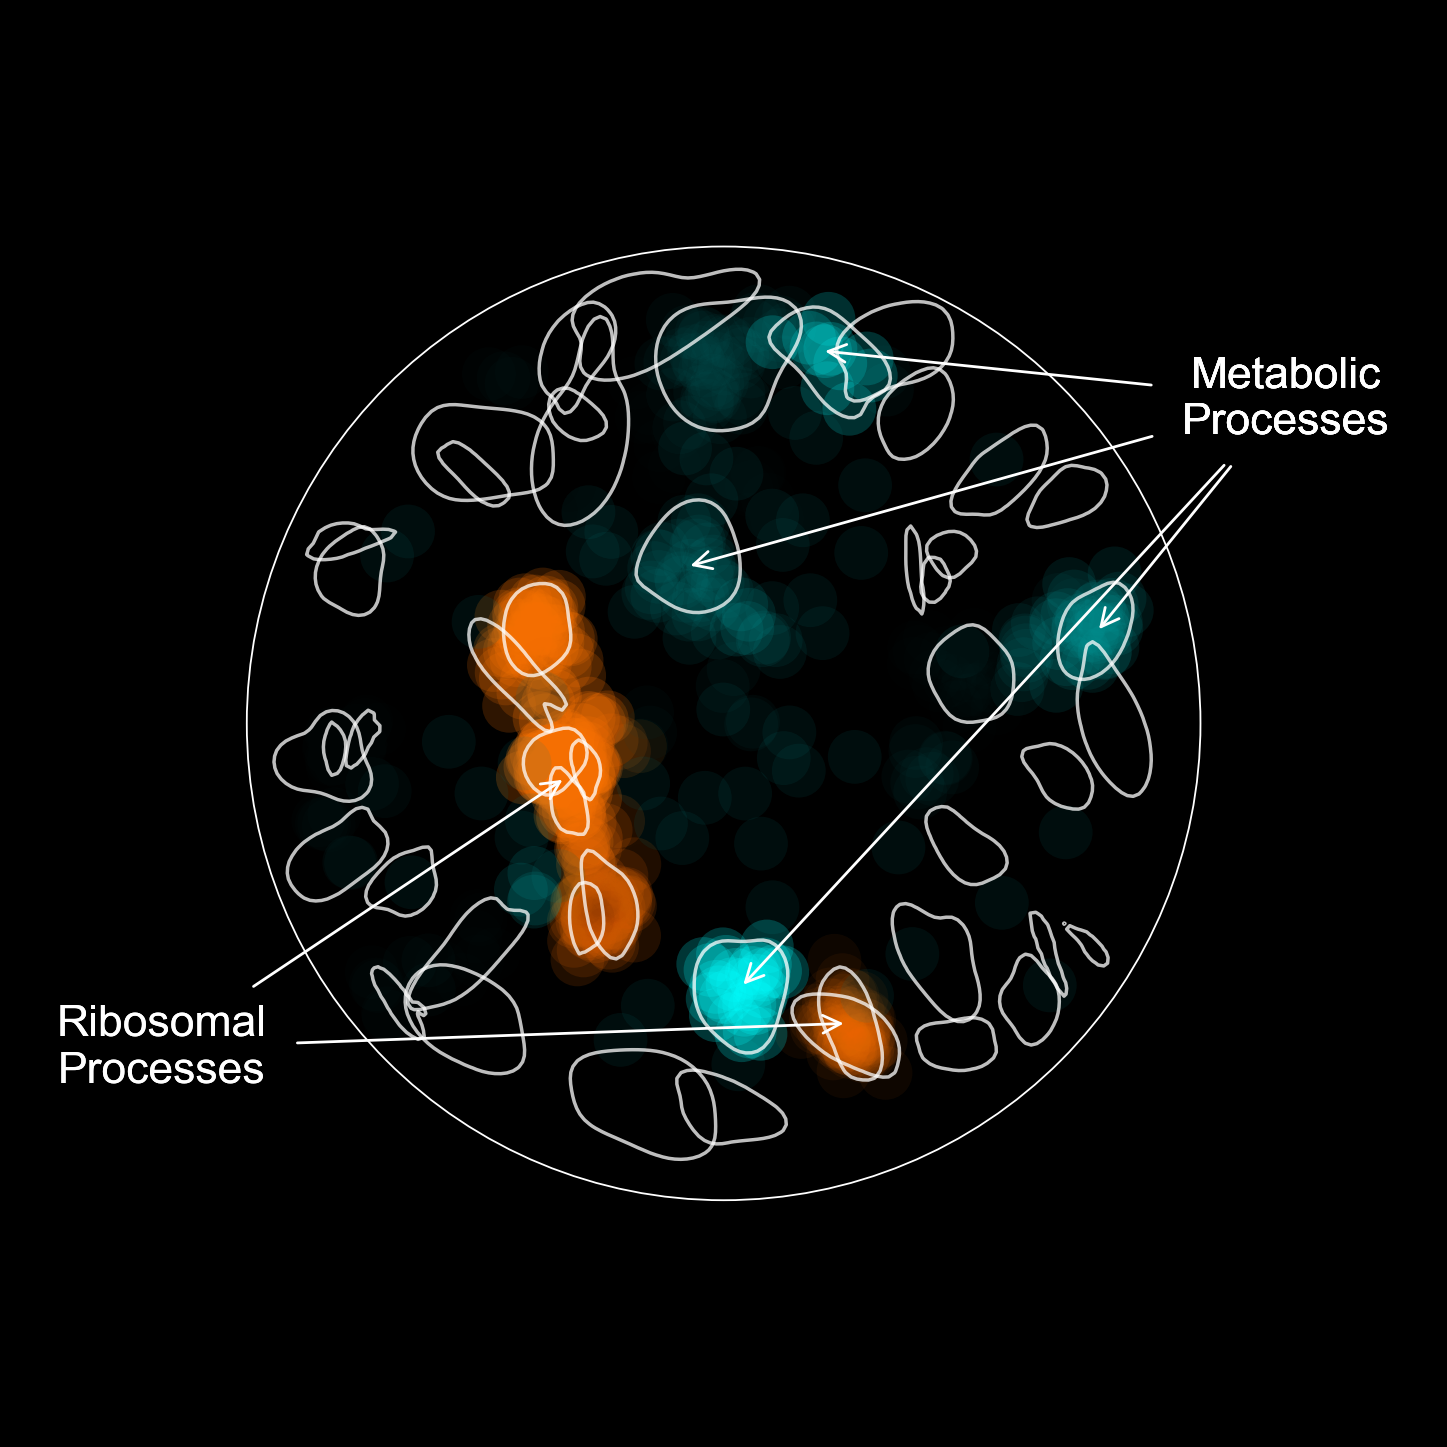

In [49]:
random_seed = 888

# Initialize the NetworkPlotter with the NetworkGraph object
coexp_plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
coexp_plotter.plot_circle_perimeter(
    scale=1.05,
    linestyle="solid",
    linewidth=1.30,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot the highly coexpressed protein subnetwork with custom node and edge attributes
coexp_plotter.plot_subnetwork(
    nodes=high_coexpression_nodes,
    node_size=1500,
    node_shape="o",
    node_edgewidth=0,
    edge_width=0,
    node_color=high_coexpression_colors,
    node_edgecolor="black",
    edge_color="black",
    node_alpha=1.0,
    edge_alpha=1.0,
)

# Plot the lowly coexpressed protein subnetwork with custom node and edge attributes
coexp_plotter.plot_subnetwork(
    nodes=low_coexpression_nodes,
    node_size=1500,
    node_shape="o",
    node_edgewidth=0,
    edge_width=0,
    node_color=low_coexpression_colors,
    node_edgecolor="black",
    edge_color="black",
    node_alpha=1.0,
    edge_alpha=1.0,
)

# Plot original yeast interactome KDE-based contours around network nodes
coexp_plotter.plot_contours(
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    color=plotter.get_annotated_contour_colors(
        cmap="gist_rainbow",
        color="white",
        min_scale=1.00,
        max_scale=1.00,
        scale_factor=1.0,
        random_seed=random_seed,
    ),
    linestyle="solid",
    linewidth=2.5,
    alpha=0.75,
    fill_alpha=0.0,
)

# Plot sublabels for ribosomal processes
coexp_plotter.plot_sublabel(
    nodes=[ribosome_nodes_0, ribosome_nodes_1],
    label="Ribosomal\nProcesses",
    radial_position=240,
    scale=1.30,
    offset=0.10,
    font="Arial",
    fontsize=32,
    fontcolor="white",
    fontalpha=1.0,
    arrow_linewidth=2.0,
    arrow_style="->",
    arrow_color="white",
    arrow_alpha=1.0,
    arrow_base_shrink=20,
    arrow_tip_shrink=0.0,
)

# Plot sublabels for metabolic processes
coexp_plotter.plot_sublabel(
    nodes=[metab_nodes_0, metab_nodes_1, metab_nodes_2, metab_nodes_3],
    label="Metabolic\nProcesses",
    radial_position=60,
    scale=1.30,
    offset=0.10,
    font="Arial",
    fontsize=32,
    fontcolor="white",
    fontalpha=1.0,
    arrow_linewidth=2.0,
    arrow_style="->",
    arrow_color="white",
    arrow_alpha=1.0,
    arrow_base_shrink=20,
    arrow_tip_shrink=0.0,
)

# Save and display the plot
coexp_plotter.show()